<a href="https://colab.research.google.com/github/Aditya-kopparthi/WeatherForecast-MLProject/blob/main/MyWeatherNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix




In [ ]:
# Load the dataset
file_path2 = 'Project1WeatherDataset.csv'
df2 = pd.read_csv(file_path2)

In [ ]:
df2.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
# Create a copy of the original dataframe to preserve data
df2_filled = df2.copy()

# List of numeric columns to fill missing values with mean
numeric_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Fill missing values for numeric columns with their mean
for col in numeric_cols:
    df2_filled[col] = df2_filled[col].fillna(df2_filled[col].mean())

# Fill missing values for the categorical column 'Weather' with its mode (most frequent value)
df2_filled['Weather'] = df2_filled['Weather'].fillna(df2_filled['Weather'].mode()[0])

# Encode the target variable (Weather) using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2_filled['Weather'] = le.fit_transform(df2_filled['Weather'])


In [ ]:

# Assume df2 has a 'Date/Time' column in string format
df2['Date/Time'] = pd.to_datetime(df2['Date/Time'])

# Extract time features
df2_filled['Hour'] = df2['Date/Time'].dt.hour
df2_filled['DayOfWeek'] = df2['Date/Time'].dt.dayofweek  # Monday=0, Sunday=6
df2_filled['Month'] = df2['Date/Time'].dt.month
df2_filled['DayOfYear'] = df2['Date/Time'].dt.dayofyear


In [ ]:
df2_filled.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Hour,DayOfWeek,Month,DayOfYear
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,7,0,6,1,1
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,7,1,6,1,1
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,9,2,6,1,1
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,9,3,6,1,1
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,7,4,6,1,1


from matplotlib import pyplot as plt
_df_0['Temp_C'].plot(kind='hist', bins=20, title='Temp_C')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Dew Point Temp_C'].plot(kind='hist', bins=20, title='Dew Point Temp_C')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rel Hum_%'].plot(kind='hist', bins=20, title='Rel Hum_%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Wind Speed_km/h'].plot(kind='hist', bins=20, title='Wind Speed_km/h')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Date/Time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Temp_C', y='Dew Point Temp_C', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Dew Point Temp_C', y='Rel Hum_%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Rel Hum_%', y='Wind Speed_km/h', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Wind Speed_km/h', y='Visibility_km', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date/Time']
  ys = series['Dew Point Temp_C']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date/Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date/Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date/Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date/Time')
_ = plt.ylabel('Dew Point Temp_C')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date/Time']
  ys = series['Rel Hum_%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date/Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date/Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date/Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date/Time')
_ = plt.ylabel('Rel Hum_%')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date/Time']
  ys = series['Wind Speed_km/h']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date/Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date/Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date/Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date/Time')
_ = plt.ylabel('Wind Speed_km/h')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date/Time']
  ys = series['Visibility_km']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Date/Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date/Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date/Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date/Time')
_ = plt.ylabel('Visibility_km')

from matplotlib import pyplot as plt
_df_13['Temp_C'].plot(kind='line', figsize=(8, 4), title='Temp_C')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Dew Point Temp_C'].plot(kind='line', figsize=(8, 4), title='Dew Point Temp_C')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Rel Hum_%'].plot(kind='line', figsize=(8, 4), title='Rel Hum_%')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Wind Speed_km/h'].plot(kind='line', figsize=(8, 4), title='Wind Speed_km/h')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Date/Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Temp_C', y='Date/Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Date/Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Dew Point Temp_C', y='Date/Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Date/Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Rel Hum_%', y='Date/Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Date/Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Wind Speed_km/h', y='Date/Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

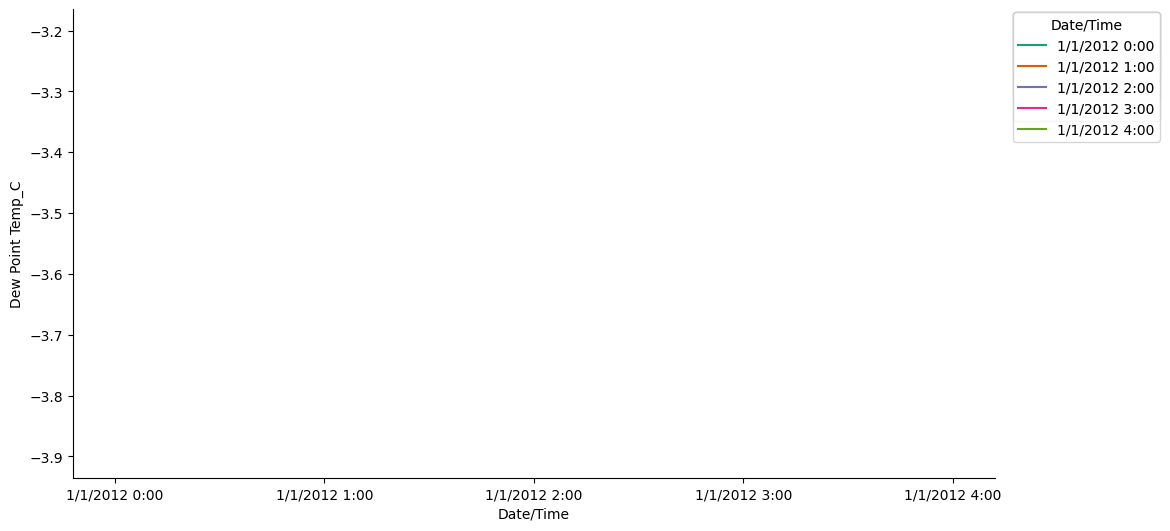

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date/Time']
  ys = series['Dew Point Temp_C']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date/Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date/Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date/Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date/Time')
_ = plt.ylabel('Dew Point Temp_C')

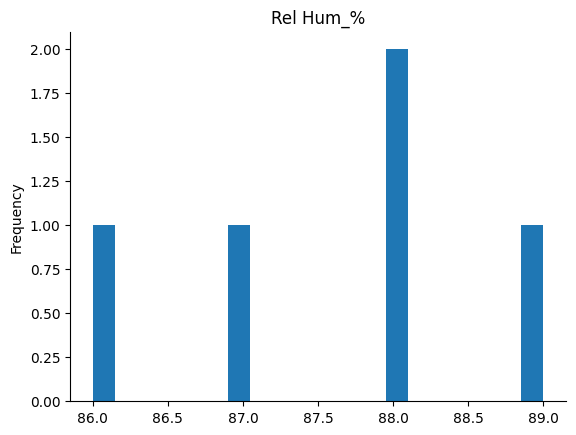

In [ ]:
from matplotlib import pyplot as plt
_df_2['Rel Hum_%'].plot(kind='hist', bins=20, title='Rel Hum_%')
plt.gca().spines[['top', 'right',]].set_visible(False)

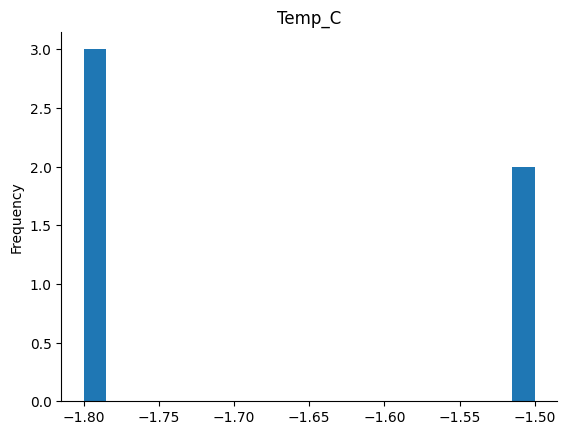

In [ ]:
from matplotlib import pyplot as plt
_df_0['Temp_C'].plot(kind='hist', bins=20, title='Temp_C')
plt.gca().spines[['top', 'right',]].set_visible(False)

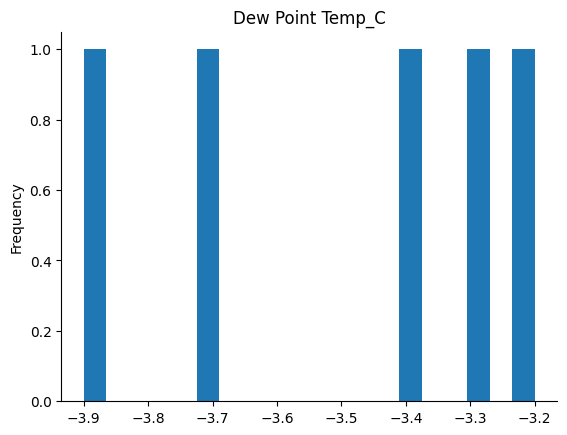

In [ ]:
from matplotlib import pyplot as plt
_df_1['Dew Point Temp_C'].plot(kind='hist', bins=20, title='Dew Point Temp_C')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Assuming your DataFrame is named df2
df2_filled = df2_filled.drop(columns=['Date/Time'])


In [ ]:
df2_filled.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Hour,DayOfWeek,Month,DayOfYear
0,-1.8,-3.9,86,4,8.0,101.24,7,0,6,1,1
1,-1.8,-3.7,87,4,8.0,101.24,7,1,6,1,1
2,-1.8,-3.4,89,7,4.0,101.26,9,2,6,1,1
3,-1.5,-3.2,88,6,4.0,101.27,9,3,6,1,1
4,-1.5,-3.3,88,7,4.8,101.23,7,4,6,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the features that need to be normalized
features_to_normalize = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
                         'Wind Speed_km/h', 'Visibility_km', 'Press_kPa',
                         'Hour', 'DayOfWeek', 'Month', 'DayOfYear']

# Initialize the scaler and apply it to the features
scaler = StandardScaler()
df2_filled[features_to_normalize] = scaler.fit_transform(df2_filled[features_to_normalize])

# Check the first few rows after normalization
print(df2_filled.head())


     Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0 -0.906815         -0.593184   1.097553        -1.259808      -1.557954   
1 -0.906815         -0.574805   1.156662        -1.259808      -1.557954   
2 -0.906815         -0.547238   1.274879        -0.914513      -1.874862   
3 -0.881146         -0.528860   1.215770        -1.029611      -1.874862   
4 -0.881146         -0.538049   1.215770        -0.914513      -1.811480   

   Press_kPa  Weather      Hour  DayOfWeek     Month  DayOfYear  
0   0.223206        7 -1.661325   1.494903 -1.597591  -1.727325  
1   0.223206        7 -1.516862   1.494903 -1.597591  -1.727325  
2   0.246904        9 -1.372399   1.494903 -1.597591  -1.727325  
3   0.258753        9 -1.227936   1.494903 -1.597591  -1.727325  
4   0.211358        7 -1.083473   1.494903 -1.597591  -1.727325  


Correlation of all features with Weather:
Temp_C              0.002244
Dew Point Temp_C    0.007874
Rel Hum_%           0.028313
Wind Speed_km/h     0.178863
Visibility_km      -0.090099
Press_kPa          -0.186999
Weather             1.000000
Hour                0.065180
DayOfWeek          -0.027224
Month              -0.012668
DayOfYear          -0.011438
Name: Weather, dtype: float64


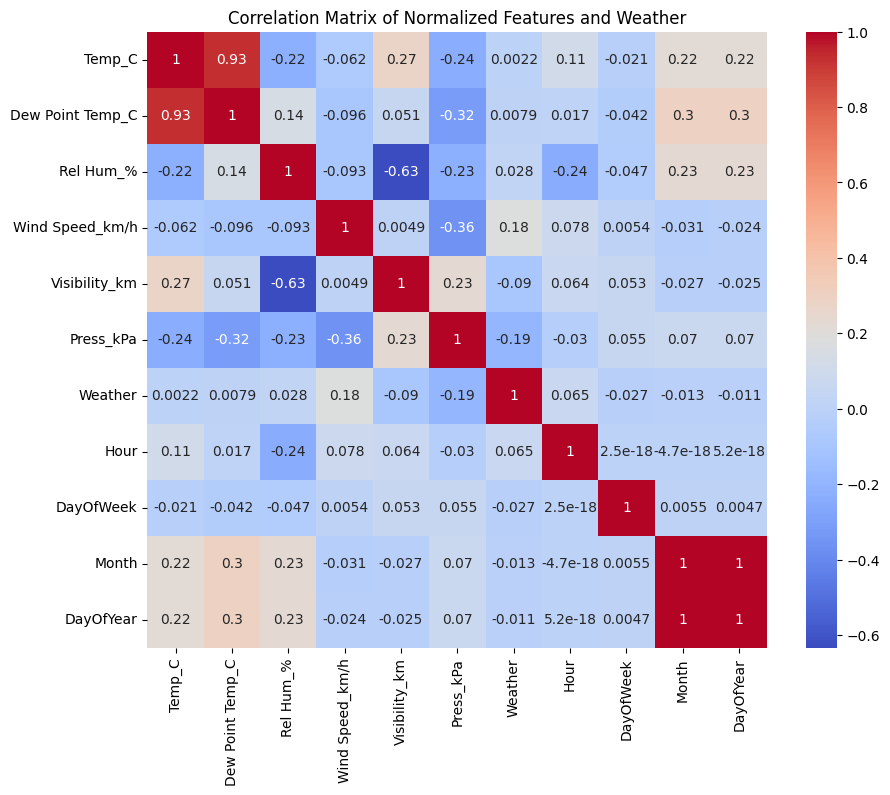

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df2_filled.corr()
print("Correlation of all features with Weather:")
print(corr_matrix['Weather'])

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Normalized Features and Weather")
plt.show()


In [ ]:
# Drop the redundant columns: 'Dew Point Temp_C' and 'Month'
df2_filled = df2_filled.drop(columns=['Dew Point Temp_C', 'Month'])

# Display the first few rows to confirm the columns have been removed
print(df2_filled.head())


     Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  Press_kPa  Weather  \
0 -0.906815   1.097553        -1.259808      -1.557954   0.223206        7   
1 -0.906815   1.156662        -1.259808      -1.557954   0.223206        7   
2 -0.906815   1.274879        -0.914513      -1.874862   0.246904        9   
3 -0.881146   1.215770        -1.029611      -1.874862   0.258753        9   
4 -0.881146   1.215770        -0.914513      -1.811480   0.211358        7   

       Hour  DayOfWeek  DayOfYear  
0 -1.661325   1.494903  -1.727325  
1 -1.516862   1.494903  -1.727325  
2 -1.372399   1.494903  -1.727325  
3 -1.227936   1.494903  -1.727325  
4 -1.083473   1.494903  -1.727325  


In [ ]:
# Separate the features (all columns except 'Weather') and the target ('Weather')
X = df2_filled.drop(columns=['Weather'])
y = df2_filled['Weather']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a baseline Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       251
           1       0.61      0.65      0.63       356
           2       0.33      0.11      0.17         9
           3       0.67      0.56      0.61        18
           5       0.00      0.00      0.00         1
           6       0.50      1.00      0.67         1
           7       0.68      0.77      0.72        35
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       1.00      0.25      0.40         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          18       0.33      1.00      0.50         1
          19       0.62      0.73      0.67       414
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.55    

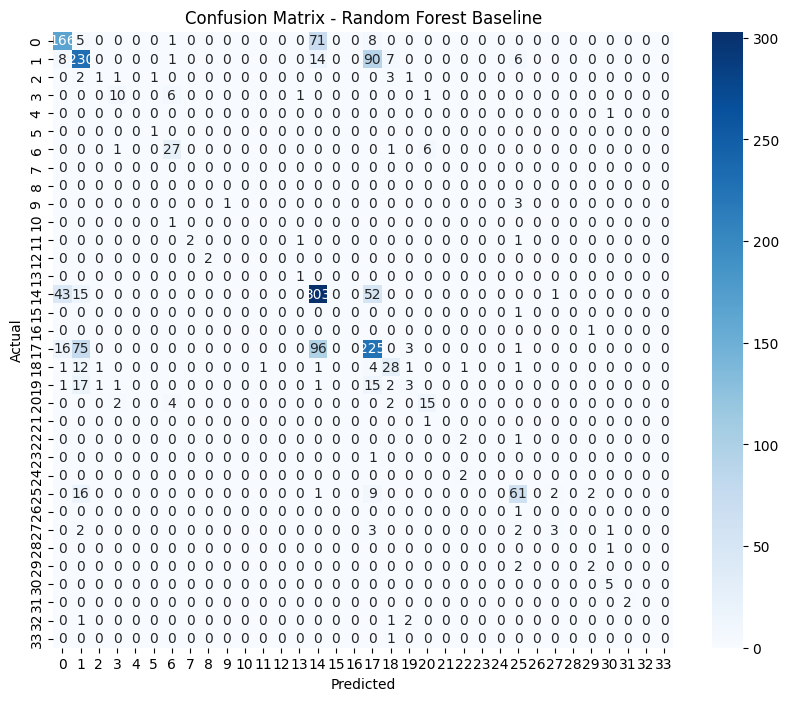

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Generate and print the classification report
print(classification_report(y_test, y_pred))

# Compute the confusion matrix and visualize it
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest Baseline")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


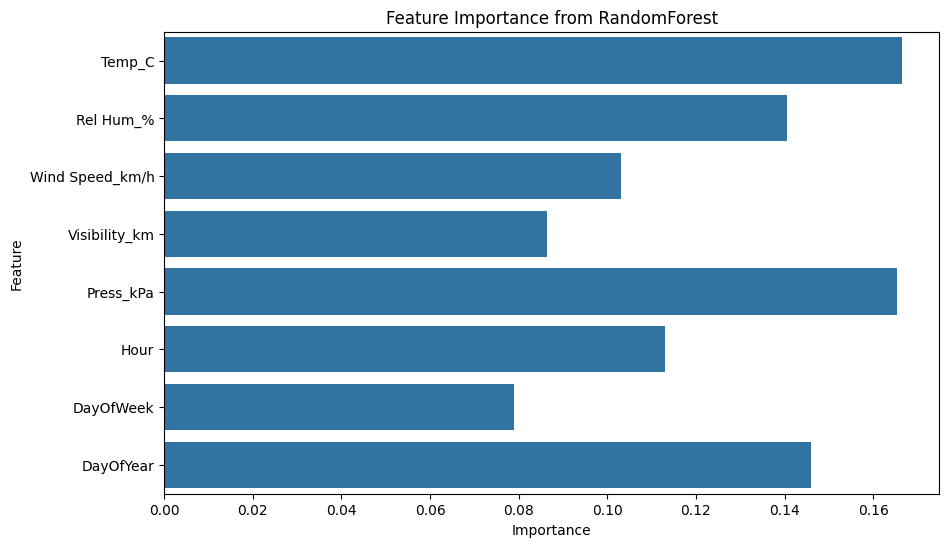

In [ ]:
import numpy as np

# Retrieve feature importances from the model
importances = rf.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from RandomForest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}

Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       251
           1       0.64      0.66      0.65       356
           2       0.20      0.11      0.14         9
           3       0.69      0.50      0.58        18
           5       0.00      0.00      0.00         1
           6       0.50      1.00      0.67         1
           7       0.65      0.80      0.72        35
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       1.00      0.50      0.67         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          18       0.25      1.00      0.40         1
          19       0.62      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

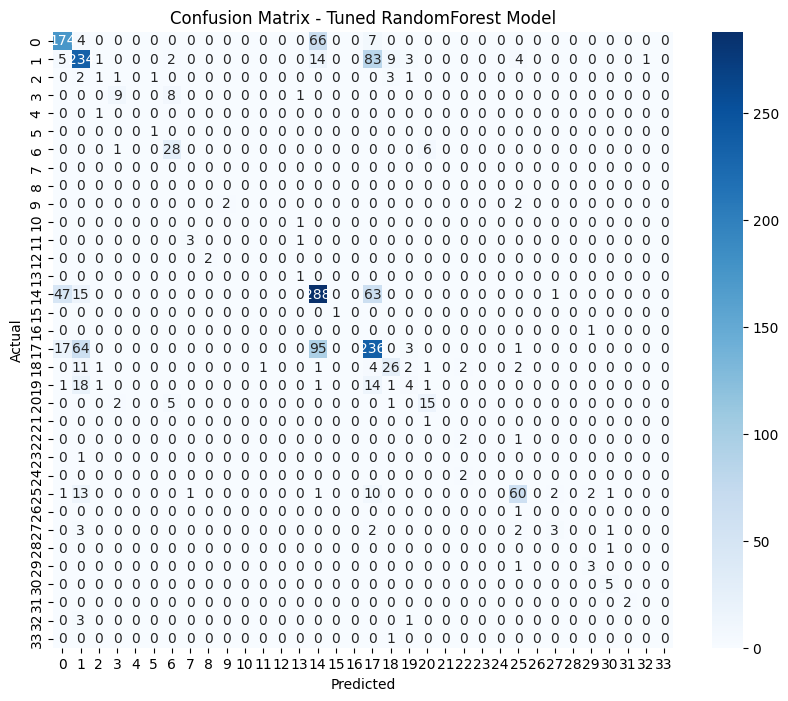

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the baseline Random Forest model
rf = RandomForestClassifier(random_state=42)

# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=10,          # Number of parameter settings sampled
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # Use all available cores
    random_state=42,
    verbose=2
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Output the best parameters found
print("Best Parameters:", random_search.best_params_)

# Retrieve the best estimator (the tuned model)
tuned_model = random_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred_tuned = tuned_model.predict(X_test)
print("\nTuned Model Classification Report:\n", classification_report(y_test, y_pred_tuned))

# Plot the confusion matrix for the tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned RandomForest Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


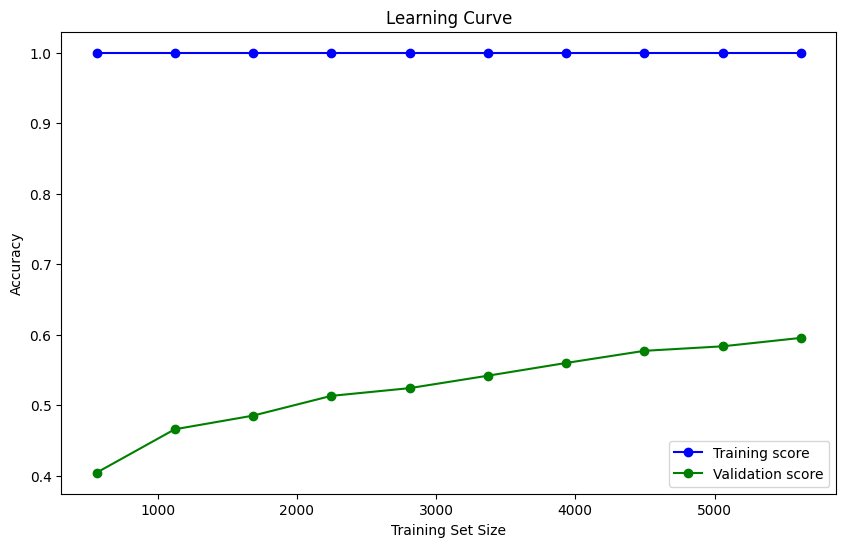

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assume rf is your RandomForestClassifier and X_train, y_train are your training data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=rf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Compute average scores for each training size
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Let's assume X and y are your features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest with more restrictive hyperparameters
rf_simple = RandomForestClassifier(
    max_depth=10,        # Restrict tree depth
    min_samples_leaf=4,  # Each leaf must have at least 4 samples
    random_state=42
)
rf_simple.fit(X_train, y_train)

# Evaluate
y_pred_simple = rf_simple.predict(X_test)
print("Classification Report with Reduced Complexity:\n", classification_report(y_test, y_pred_simple))


Classification Report with Reduced Complexity:
               precision    recall  f1-score   support

           0       0.58      0.56      0.57       251
           1       0.54      0.54      0.54       356
           2       0.00      0.00      0.00         9
           3       0.75      0.50      0.60        18
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.66      0.77      0.71        35
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          18       0.50      1.00      0.67         1
          19       0.51      0.68      0.59       414
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.47      0.44      0.45       416
          24       0.51      0.41

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [100, 200]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_best = best_model.predict(X_test)
print("Tuned Model Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
162 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-pa

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       251
           1       0.61      0.62      0.62       356
           2       0.50      0.11      0.18         9
           3       0.71      0.67      0.69        18
           5       0.00      0.00      0.00         1
           6       0.50      1.00      0.67         1
           7       0.70      0.80      0.75        35
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          18       0.50      1.00      0.67         1
          19       0.59      0.71      0.64       414
          21       0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.model_selection import cross_val_score

rf_cv = RandomForestClassifier(random_state=42, max_depth=10, min_samples_leaf=4)
scores = cross_val_score(rf_cv, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.06260672 0.2749004  0.26920888 0.33579966 0.21526196]
Average accuracy: 0.23155552213534408


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Text(0.5, 1.0, 'Learning Curve')

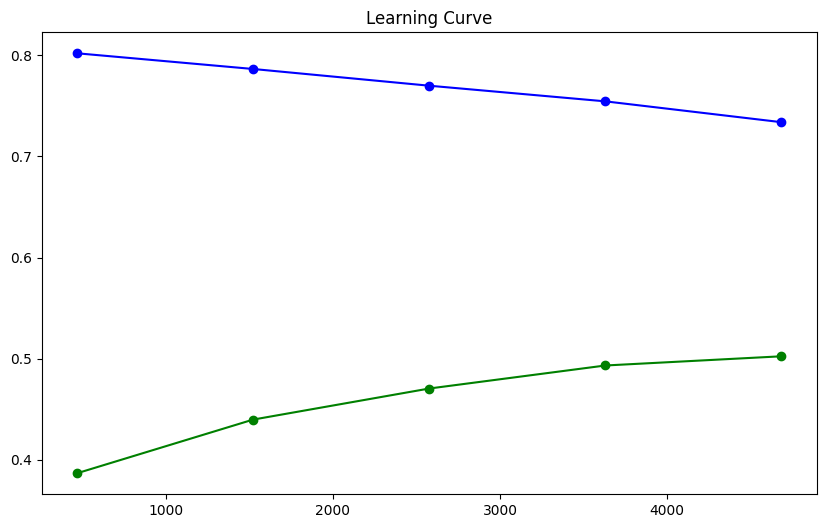

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=rf_simple,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation score')
plt.title('Learning Curve')
